save figure to file /Users/yunjunz/insarlab/Kirishima/KirishimaModel/DATA/DEM/gsi.dem.jpeg


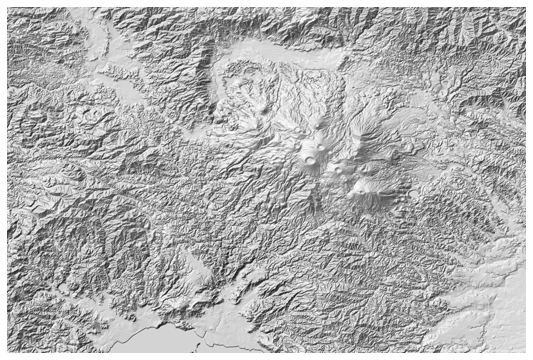

In [11]:
## prepare the shaded relief figure of DEM in jpeg format for GeodMod

%matplotlib inline
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from pysar.utils import readfile

# file I/O name
dem_file = os.path.expanduser('~/insarlab/Kirishima/KirishimaModel/DATA/DEM/gsi.dem')
out_file = dem_file+'.jpeg'
rsc_file = out_file+'.rsc'
shutil.copy2(dem_file+'.rsc', rsc_file)

# read data
dem = readfile.read(dem_file)[0]

# figure size
ds_shape = tuple(reversed(dem.shape))
fig_dpi = 300
fig_size = [i / fig_dpi for i in ds_shape]

# color range
disp_min = np.nanmin(dem) - 4000
disp_max = np.nanmax(dem) + 2000

# prepare shaded relief
ls = LightSource(azdeg=315, altdeg=45)
dem_shade = ls.shade(dem, vert_exag=0.3, cmap=plt.get_cmap('gray'), vmin=disp_min, vmax=disp_max)
dem_shade[np.isnan(dem_shade[:, :, 0])] = np.nan

# plot
fig, ax = plt.subplots(figsize=fig_size)
ax.imshow(dem_shade, interpolation='spline16', origin='upper')
# get rid of whitespace on the side
ax.axis('off')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# output
print('save figure to file {}'.format(out_file))
plt.savefig(out_file, transparent=True, dpi=300, pad_inches=0.0)
plt.show()